In [94]:
import matplotlib.pyplot as plt  # for plotting graphs
# import required python libraries
import pandas as pd
import seaborn as sns

%matplotlib inline

# load set in to Pandas dataframe
df = pd.read_csv('./data/survey_results_public-2019.csv')
schema_df = pd.read_csv('./data/survey_results_schema-2019.csv')
# preview head of the dataset
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [95]:
schema_df.values

array([['Respondent',
        'Randomized respondent ID number (not in order of survey response time)'],
       ['MainBranch',
        'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'],
       ['Hobbyist', 'Do you code as a hobby?'],
       ['OpenSourcer', 'How often do you contribute to open source?'],
       ['OpenSource',
        'How do you feel about the quality of open source software (OSS)?'],
       ['Employment',
        'Which of the following best describes your current employment status?'],
       ['Country', 'In which country do you currently reside?'],
       ['Student',
        'Are you currently enrolled in a formal, degree-granting college or university program?'],
       ['EdLevel',
        'Which of the following best describes the highest level of formal education that you’ve completed?'],
       ['UndergradMajor',
        'What was your main or most important field of study?'],
       ['EduOther',
  

In [96]:
df['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

Text(0, 0.5, 'Number of Respondents')

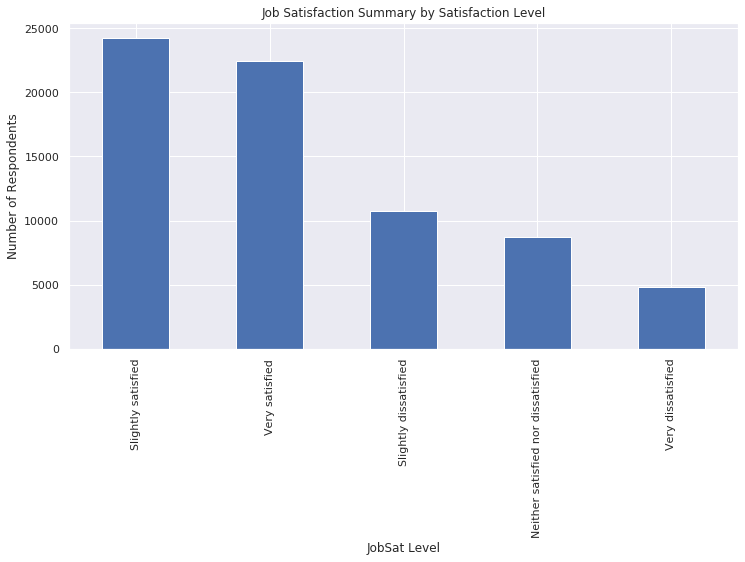

In [97]:
sns.set(font_scale=1)
df['JobSat'].value_counts().plot.bar(figsize=(12, 6))
plt.title('Job Satisfaction Summary by Satisfaction Level')
plt.xlabel('JobSat Level')
plt.ylabel('Number of Respondents') 

In [98]:
df.loc[(df['Gender']  !='Man') & (df['Gender'] !='Woman'), 'Gender'] = 'Other'
df.loc[ df['Gender']  =='Man', 'Gender'] = 'Male'
df.loc[ df['Gender']  =='Woman', 'Gender'] = 'Female'

In [99]:
df['JobSat'].dropna(axis=0).values

array(['Slightly satisfied', 'Slightly satisfied',
       'Slightly dissatisfied', ..., 'Neither satisfied nor dissatisfied',
       'Very dissatisfied', 'Slightly dissatisfied'], dtype=object)

In [100]:
job_sat_vals = ['Slightly satisfied','Very satisfied']
job_dis_sat_vals = ['Slightly dissatisfied','Very dissatisfied']

In [101]:
most_job_sat_df = df.copy()[(df['JobSat'] == job_sat_vals[0] ) | (df['JobSat'] == job_sat_vals[1])]
un_sat_df = df.copy()[(df['JobSat'] == job_dis_sat_vals[0] ) | (df['JobSat']== job_dis_sat_vals[1])]

In [102]:
# overall job satisfaction pie 
most_job_sat_df.loc[:, 'JobSat'] = 'Satisfied'
un_sat_df.loc[:, 'JobSat'] = 'Dissatisfied'

In [103]:
merge_df = pd.concat([most_job_sat_df, un_sat_df], axis=0)

Text(0.5, 1.0, 'Overall Job Satisfaction Summary')

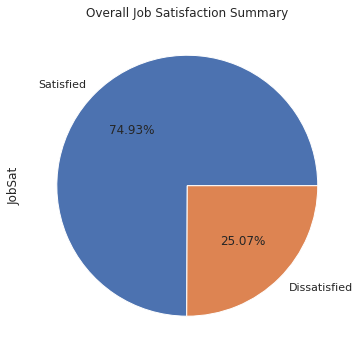

In [104]:
sns.set(font_scale=1)
merge_df['JobSat'].value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=(12, 6))
plt.title('Overall Job Satisfaction Summary')

In [105]:
def merge_sat_and_dsat_by_cols(col):
    most_job_sat_col_df = most_job_sat_df.groupby([col]).size().sort_values(ascending=False).reset_index(name='SatCount')
    least_job_sat_col_df = un_sat_df.groupby([col]).size().sort_values(ascending=False).reset_index(name='DisSatCount')
    return pd.merge(most_job_sat_col_df, least_job_sat_col_df , on=col)



In [106]:
def calculate_sat_and_dsat_pecentage(merged_df):
    merged_df['SatPercentage'] = merged_df['SatCount'] / (merged_df['SatCount']+merged_df['DisSatCount']) 
    merged_df['SatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['SatPercentage']], 
                                           index = merged_df.index)
    
    merged_df['DisSatPercentage'] = merged_df['DisSatCount'] / (merged_df['SatCount']+merged_df['DisSatCount'])
    merged_df['DisSatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['DisSatPercentage']], 
                                              index = merged_df.index)
    total = merged_df['SatCount'] + merged_df['DisSatCount']
    total_sum = merged_df['SatCount'].sum() + merged_df['DisSatCount'].sum()
    merged_df['Total'] =  total
    
    merged_df['TotalPercentage'] = total/total_sum
    merged_df['TotalPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['TotalPercentage']], 
                                              index = merged_df.index)
    return merged_df.sort_values(by='SatPercentage', ascending=False).reset_index(drop=True)




In [107]:
merge_gender_df = merge_sat_and_dsat_by_cols('Gender')

In [108]:
calculate_sat_and_dsat_pecentage(merge_gender_df)



,Gender,SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,Female,3319,1036,76.21%,23.79%,4355,6.99%
1,Male,41481,13865,74.95%,25.05%,55346,88.88%
2,Other,1859,708,72.42%,27.58%,2567,4.12%


In [109]:
col_age_group = 'AgeGroup(Years)'
age_range_labels = ['15-24', '25-34','35-44','45-54','55-64']
most_job_sat_df.loc[:,col_age_group] = pd.cut(most_job_sat_df['Age'], bins=[14, 24, 34, 44, 54, 64], labels=age_range_labels)
un_sat_df.loc[:,col_age_group] = pd.cut(un_sat_df['Age'], bins=[14, 24, 34, 44, 54, 64],labels=age_range_labels)

In [110]:
merged_age_group_df = merge_sat_and_dsat_by_cols(col_age_group)

In [111]:
calculate_sat_and_dsat_pecentage(merged_age_group_df)


,AgeGroup(Years),SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,55-64,843,240,77.84%,22.16%,1083,1.90%
1,15-24,8017,2429,76.75%,23.25%,10446,18.37%
2,35-44,8813,2966,74.82%,25.18%,11779,20.72%
3,25-34,22500,7584,74.79%,25.21%,30084,52.91%
4,45-54,2593,876,74.75%,25.25%,3469,6.10%


Text(0.5, 1.0, 'Job Dissatisfaction Age Groups')

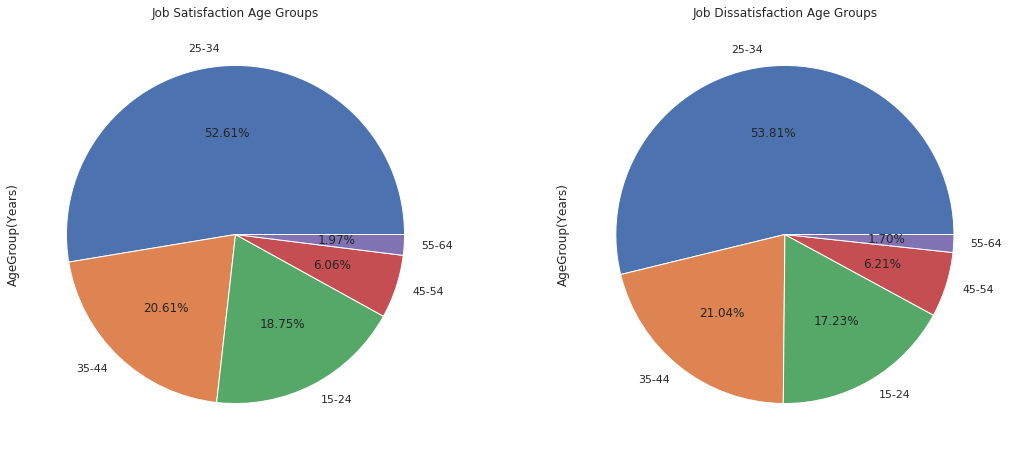

In [112]:
fig ,axs = plt.subplots(1,2, figsize=(15, 15))
most_job_sat_df[col_age_group].value_counts().plot(kind='pie', ax=axs.flatten()[0], autopct='%1.2f%%')
axs[0].set_title('Job Satisfaction Age Groups')
un_sat_df[col_age_group].value_counts().plot(kind='pie', ax=axs.flatten()[1], autopct='%1.2f%%')
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
axs[1].set_title('Job Dissatisfaction Age Groups')

In [113]:
merged_edl_df = merge_sat_and_dsat_by_cols('EdLevel')

In [114]:
calculate_sat_and_dsat_pecentage(merged_edl_df)

,EdLevel,SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,"Other doctoral degree (Ph.D, Ed.D., etc.)",1592,395,80.12%,19.88%,1987,3.25%
1,"Secondary school (e.g. American high school, G...",2433,702,77.61%,22.39%,3135,5.12%
2,Associate degree,1537,476,76.35%,23.65%,2013,3.29%
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",11805,3849,75.41%,24.59%,15654,25.58%
4,Some college/university study without earning ...,5252,1734,75.18%,24.82%,6986,11.42%
5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",22297,7691,74.35%,25.65%,29988,49.00%
6,Primary/elementary school,220,93,70.29%,29.71%,313,0.51%
7,"Professional degree (JD, MD, etc.)",565,287,66.31%,33.69%,852,1.39%
8,I never completed any formal education,178,94,65.44%,34.56%,272,0.44%


In [115]:
merged_unmajor_df = merge_sat_and_dsat_by_cols('UndergradMajor')

In [116]:
calculate_sat_and_dsat_pecentage(merged_unmajor_df)


,UndergradMajor,SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,"A social science (ex. anthropology, psychology...",808,211,79.29%,20.71%,1019,1.79%
1,"A health science (ex. nursing, pharmacy, radio...",145,40,78.38%,21.62%,185,0.32%
2,"A natural science (ex. biology, chemistry, phy...",1982,557,78.06%,21.94%,2539,4.45%
3,Mathematics or statistics,1745,501,77.69%,22.31%,2246,3.94%
4,"A humanities discipline (ex. literature, histo...",945,288,76.64%,23.36%,1233,2.16%
5,"A business discipline (ex. accounting, finance...",997,304,76.63%,23.37%,1301,2.28%
6,Fine arts or performing arts (ex. graphic desi...,721,231,75.74%,24.26%,952,1.67%
7,"Computer science, computer engineering, or sof...",26938,9079,74.79%,25.21%,36017,63.17%
8,"Another engineering discipline (ex. civil, ele...",3480,1236,73.79%,26.21%,4716,8.27%
9,Web development or web design,1696,632,72.85%,27.15%,2328,4.08%


Text(0.5, 1.0, 'Income Level by Job Dissatisfaction')

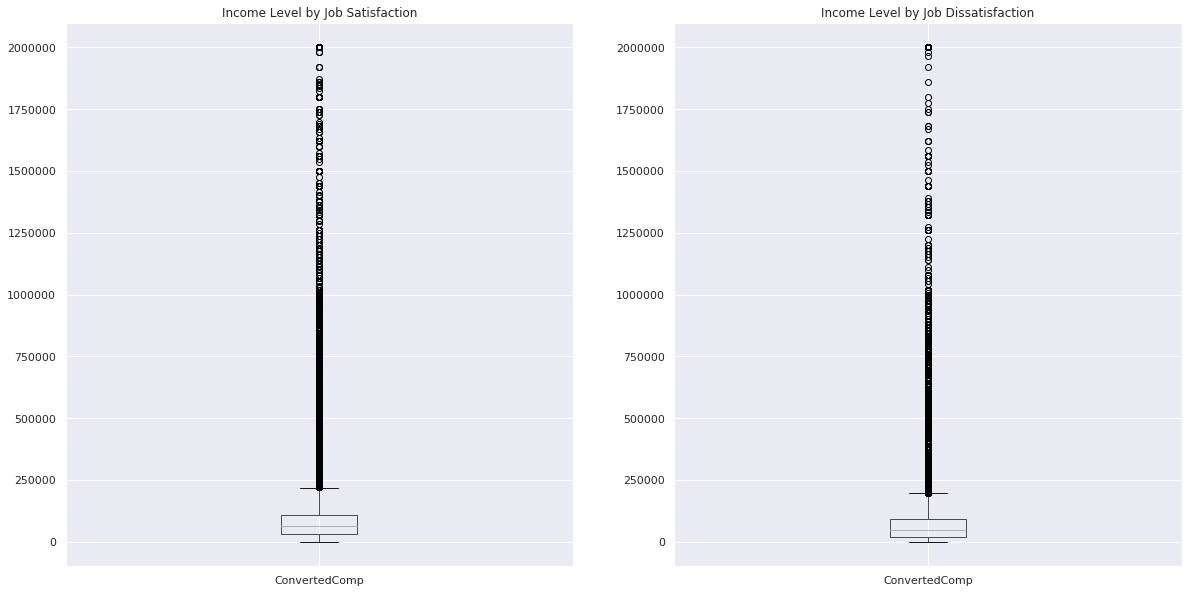

In [117]:
#before removing outliers
fig, axs = plt.subplots(1,2, figsize=(20,10))
most_job_sat_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[0])
axs[0].set_title('Income Level by Job Satisfaction')
un_sat_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[1])
axs[1].set_title('Income Level by Job Dissatisfaction')

Text(0.5, 1.0, 'Least Job Satisfaction')

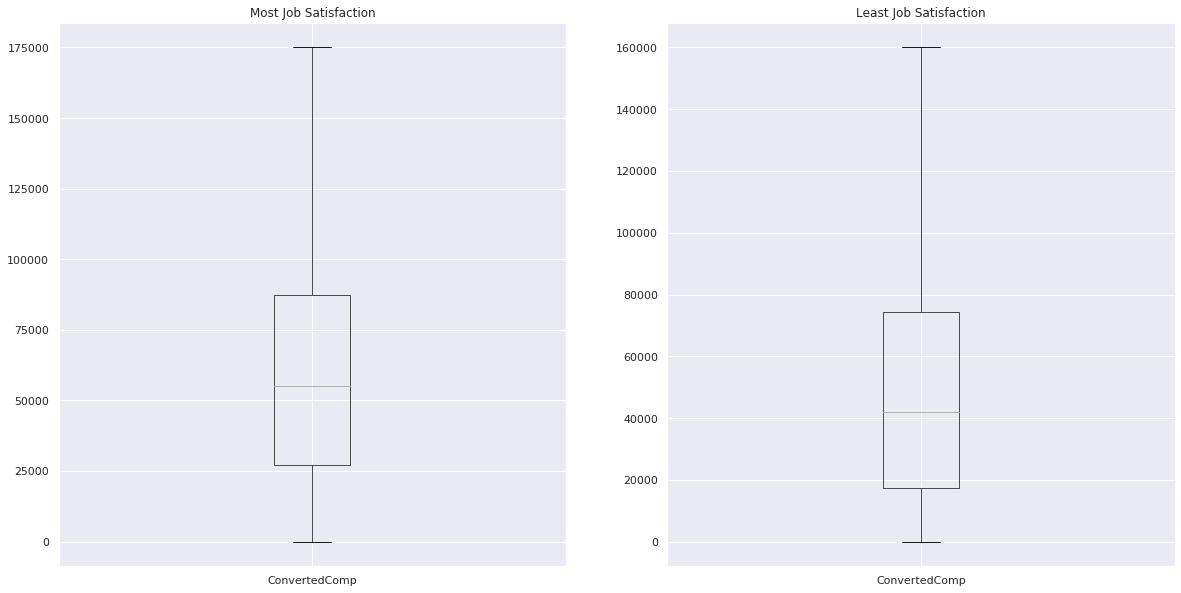

In [118]:
# after removing outliers
fig, axs = plt.subplots(1,2, figsize=(20,10))

most_job_sat_df[most_job_sat_df['ConvertedComp'] <= 175000].boxplot(column=['ConvertedComp'], ax=axs.flatten()[0])
axs[0].set_title('Most Job Satisfaction')
un_sat_df[un_sat_df['ConvertedComp'] <= 160000].boxplot(column=['ConvertedComp'], ax=axs.flatten()[1])
axs[1].set_title('Least Job Satisfaction')

In [119]:
# salary ranges wise grouping
salary_range_labels = ['25K-50K', '50K-75K','75K-100K','100K-125K','125K-150K', '150K-175K']
salary_bins = [25000, 50000, 75000, 100000, 125000, 150000, 175000]
income_level_group = 'IncomeGroup($)'
most_job_sat_df.loc[:,income_level_group] = pd.cut(most_job_sat_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)
un_sat_df.loc[:,income_level_group] = pd.cut(un_sat_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)


In [120]:
merged_income_group_df = merge_sat_and_dsat_by_cols(income_level_group)

In [121]:
calculate_sat_and_dsat_pecentage(merged_income_group_df)

,IncomeGroup($),SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,125K-150K,2013,498,80.17%,19.83%,2511,7.64%
1,150K-175K,987,252,79.66%,20.34%,1239,3.77%
2,100K-125K,2923,752,79.54%,20.46%,3675,11.18%
3,75K-100K,4837,1327,78.47%,21.53%,6164,18.75%
4,50K-75K,7154,2109,77.23%,22.77%,9263,28.17%
5,25K-50K,7379,2651,73.57%,26.43%,10030,30.50%


In [122]:
gender_income_df = df.copy()[(df['Gender'] == 'Male') | (df['Gender'] == 'Female') ][['Gender', 'ConvertedComp', 'JobSat']]
gender_income_df  = gender_income_df.dropna(axis=0)

In [123]:
gender_income_df.loc[:,income_level_group] = pd.cut(gender_income_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)

gender_income_df = gender_income_df.dropna(subset=[income_level_group],axis=0)
selected_df =  gender_income_df.copy()[['Gender', income_level_group, 'JobSat']]

In [124]:
selected_df.loc[selected_df['JobSat'] =='Slightly satisfied', 'JobSat'] = 'Satisfied'
selected_df.loc[selected_df['JobSat'] =='Very satisfied', 'JobSat'] = 'Satisfied'

In [125]:
job_sat_income_gender_df =  selected_df[selected_df['JobSat'] =='Satisfied']\
    .groupby([income_level_group,'Gender'])\
    .count().reset_index()

In [126]:
male_df = job_sat_income_gender_df[job_sat_income_gender_df['Gender'] == 'Male'][[income_level_group,'JobSat']]
male_df.columns = [income_level_group, 'MaleJobSat']

In [127]:
female_df = job_sat_income_gender_df[job_sat_income_gender_df['Gender'] == 'Female'][[income_level_group,'JobSat']]
female_df.columns = [income_level_group, 'FemaleJobSat']

In [128]:
gender_contact_df = pd.merge(female_df, male_df, on=income_level_group)
gender_contact_df

,IncomeGroup($),FemaleJobSat,MaleJobSat
0,25K-50K,522,6674
1,50K-75K,532,6434
2,75K-100K,371,4340
3,100K-125K,239,2592
4,125K-150K,161,1794
5,150K-175K,55,904


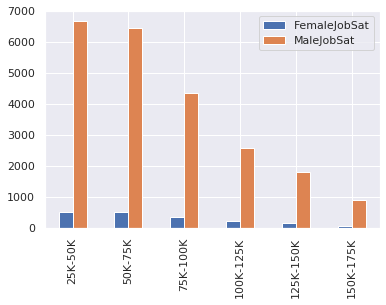

In [129]:
gender_contact_df.index = salary_range_labels
gender_contact_df.plot(kind='bar' )
